### **Lab6-P2.ipynb**

#### Activity
- Data science - Laboratorio 6 Part 2

#### Authors: 
- Diego Lemus
- Fabián Juárez


#### Date:
- 8 de Septiembre 2024


#### Repository:
- Link: https://github.com/FabianJuarez182/DS-LAB6


### Task 2 y 3

In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import string

# Cargar el archivo CSV
df = pd.read_csv('GrammarandProductReviews.csv')
# Mostrar las primeras filas para verificar la carga correcta
print(df.head())

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres especiales y signos de puntuación
    text = re.sub(r'\@\w+|\#|\d+', '', text)  # Quitar hashtags, menciones, y números
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Clean the 'reviews.text' column
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: clean_text(str(x)))

# Display the cleaned text of the first few rows
df[['reviews.text', 'cleaned_reviews']].head()

                     id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                         

,reviews.text,cleaned_reviews
0,i love this album. it's very good. more to the...,love album good hip hop current pop sound hype...
1,Good flavor. This review was collected as part...,good flavor review collected promotion
2,Good flavor.,good flavor
3,I read through the reviews on here before look...,read reviews looking buying couples lubricants...
4,My husband bought this gel for us. The gel cau...,husband bought gel gel caused irritation felt ...


Descripción de las actividades de preprocesamiento:
1. **Cargar el archivo CSV**:
    - Se cargó el archivo GrammarandProductReviews.csv, que contiene reseñas de productos, en un DataFrame utilizando la biblioteca pandas.

2. **Función para limpiar el texto**: Se definió una función para limpiar el texto de las reseñas, eliminando elementos irrelevantes para el análisis de sentimiento.

    - **Convertir a minúsculas**:
        Todo el texto fue convertido a minúsculas para uniformar las palabras y evitar diferencias entre palabras como "Good" y "good".

    - **Eliminar URLs**:
        Se eliminaron todas las URLs presentes en el texto, ya que no aportan valor al análisis de las opiniones.

   - **Eliminar caracteres especiales y signos de puntuación**:
        Se eliminaron caracteres como símbolos especiales, números y puntuación (como "#", "@", "123", etc.) para centrarse en las palabras significativas.

    - **Eliminar stopwords**:
        Utilizando una lista manual de stopwords en inglés, se eliminaron palabras comunes (como "the", "and", "is", etc.) que no aportan significado relevante al análisis de sentimiento.

3. **Aplicar la función de limpieza a la columna de reseñas**:

    - La función de limpieza se aplicó a cada reseña en la columna reviews.text, y el resultado se guardó en una nueva columna cleaned_reviews, donde cada reseña ahora está libre de caracteres especiales y stopwords.

4. **Análisis exploratorio inicial**:

    - Contar palabras más frecuentes: Se utilizó la clase Counter de la biblioteca collections para contar la frecuencia de las palabras en las reseñas limpias, identificando las palabras más comunes.

### Task 4

[('great', 20946), ('product', 20272), ('movie', 19738), ('review', 18907), ('promotion', 17734), ('collected', 17726), ('love', 16899), ('use', 15953), ('good', 12201), ('like', 11332)]


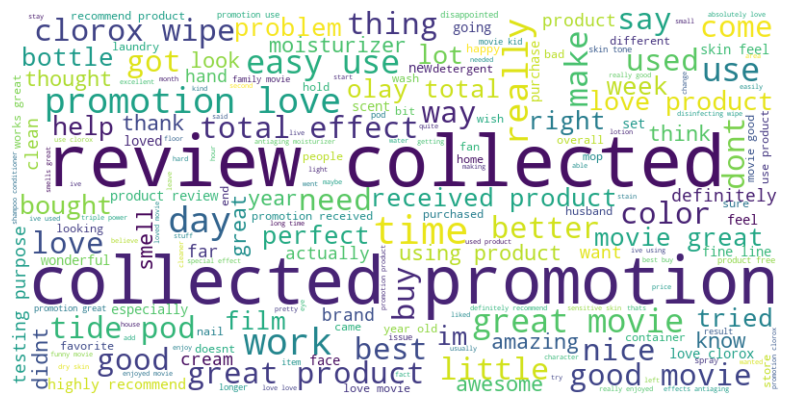

In [3]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Contar las palabras más frecuentes en las reseñas limpias
all_reviews_text = ' '.join(df['cleaned_reviews'].dropna())
word_counts = Counter(all_reviews_text.split())

# Mostrar las 10 palabras más frecuentes
print(word_counts.most_common(10))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


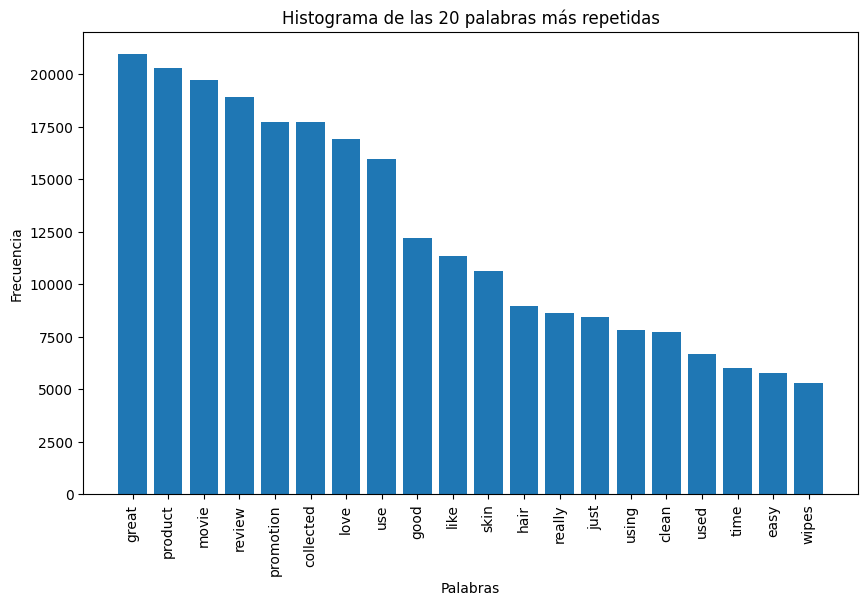

In [4]:
import matplotlib.pyplot as plt

# Obtener las 20 palabras más comunes
common_words = word_counts.most_common(20)

# Separar palabras y sus frecuencias
words, frequencies = zip(*common_words)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Histograma de las 20 palabras más repetidas')
plt.show()

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el lexicón de VADER
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento VADER
sia = SentimentIntensityAnalyzer()

# Función para aplicar el análisis de sentimiento
def vader_sentiment(text):
    scores = sia.polarity_scores(text)
    # Devolver la polaridad
    return scores['compound']  # compound es el puntaje general de sentimiento

# Aplicar el análisis de sentimiento a las reseñas limpias
df['vader_score'] = df['cleaned_reviews'].apply(lambda x: vader_sentiment(x))

# Clasificar las reseñas como positivas, negativas o neutrales en base al score
def classify_vader(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Clasificar las reseñas basadas en el score de VADER
df['vader_sentiment'] = df['vader_score'].apply(classify_vader)

# Verificar los resultados
print(df[['cleaned_reviews', 'vader_score', 'vader_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\domot\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                     cleaned_reviews  vader_score  \
0  love album good hip hop current pop sound hype...       0.6908   
1             good flavor review collected promotion       0.4404   
2                                        good flavor       0.4404   
3  read reviews looking buying couples lubricants...      -0.7717   
4  husband bought gel gel caused irritation felt ...      -0.4423   

  vader_sentiment  
0        positive  
1        positive  
2        positive  
3        negative  
4        negative  
